In [1]:
!pip install diffusers transformers accelerate torch torchvision matplotlib


In [2]:
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
from huggingface_hub import login

# Login to Hugging Face
login()


In [4]:
# Load the Stable Diffusion pipeline
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Use GPU for faster processing


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
def generate_image(prompt, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate an image from text using Stable Diffusion.

    Args:
        prompt (str): The text description of the image.
        num_inference_steps (int): The number of diffusion steps.
        guidance_scale (float): How much the model should follow the prompt.

    Returns:
        PIL.Image.Image: The generated image.
    """
    image = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
    return image


  0%|          | 0/50 [00:00<?, ?it/s]

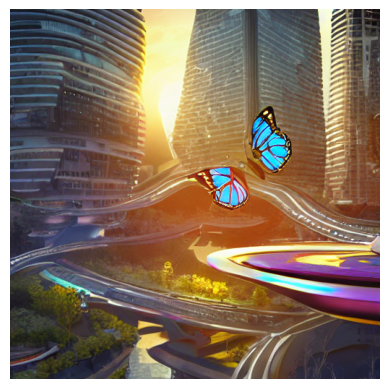

In [13]:
# Example prompt
prompt = "A futuristic cityscape with flying cars and butterflies at sunset"

# Generate the image
image = generate_image(prompt)

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()


In [ ]:
# Save the generated image to a file
image.save("generated_image.png")
print("Image saved as generated_image.png")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Text(value='A futuristic cityscape with flying cars at sunset', description='Prompt:', layout=Layout(width='60…

Button(button_style='success', description='Generate Image', style=ButtonStyle())

  0%|          | 0/50 [00:00<?, ?it/s]

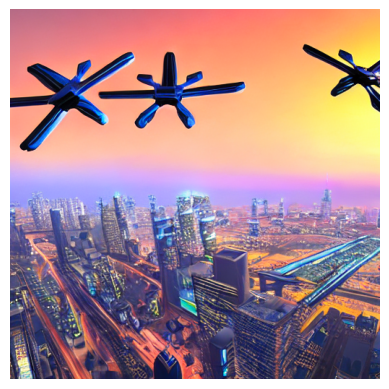

  0%|          | 0/50 [00:00<?, ?it/s]

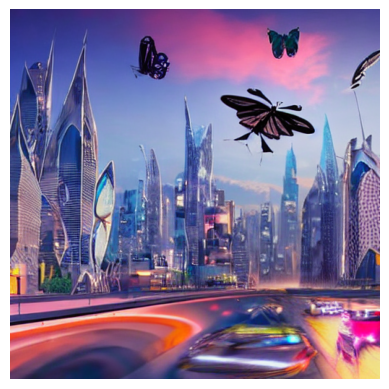

In [8]:
!pip install diffusers transformers accelerate torch torchvision matplotlib
import torch
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
from huggingface_hub import login
from IPython.display import display
import ipywidgets as widgets

# Login to Hugging Face
login()

# Load the Stable Diffusion pipeline
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Use GPU for faster processing

def generate_image(prompt, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate an image from text using Stable Diffusion.

    Args:
        prompt (str): The text description of the image.
        num_inference_steps (int): The number of diffusion steps.
        guidance_scale (float): How much the model should follow the prompt.

    Returns:
        PIL.Image.Image: The generated image.
    """
    image = pipe(prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
    return image

# Create an interactive input box for prompt
def on_generate_button_clicked(b):
    # Get the text from the input box
    prompt = prompt_box.value
    if prompt:
        print(f"Generating image for prompt: '{prompt}'")
        image = generate_image(prompt)

        # Display the image
        plt.imshow(image)
        plt.axis("off")
        plt.show()

        # Save the generated image
        image.save("generated_image.png")
        print("Image saved as generated_image.png")
    else:
        print("Please enter a prompt!")

# Create input box and button
prompt_box = widgets.Text(
    value='A futuristic cityscape with flying cars at sunset',
    placeholder='Enter your image description',
    description='Prompt:',
    layout=widgets.Layout(width='600px')
)

generate_button = widgets.Button(
    description="Generate Image",
    button_style="success"
)

generate_button.on_click(on_generate_button_clicked)

# Display the input box and button
display(prompt_box, generate_button)
